# FPGheArt - Week 4 exercise

### Lorenzo Buriola - 2021860
### Filippo Conforto - 2021856
### Lorenzo Domenichetti - 2011653


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

# PART 1

## Data loading and 3d visualization

In [2]:
data = np.loadtxt("DATA/data_t-SNE_310101_d5_R100_e1_N800.dat")

data = pd.DataFrame(data)
data.shape

(800, 5)

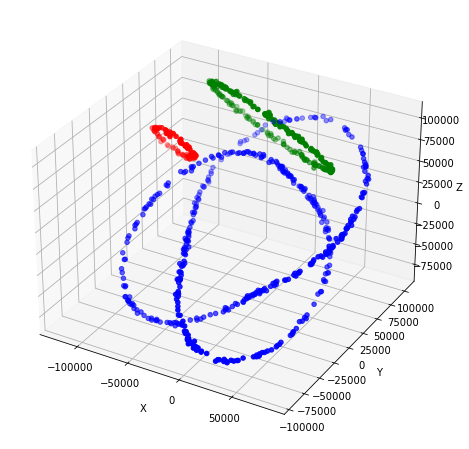

In [3]:
# Fixing random state for reproducibility
np.random.seed(12345)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data.iloc[:80,0], data.iloc[:80,1], data.iloc[:80,2], marker='o', color = 'red')
ax.scatter(data.iloc[80:320,0], data.iloc[80:320,1], data.iloc[80:320,2], marker='o', color = 'green')
ax.scatter(data.iloc[320:,0], data.iloc[320:,1], data.iloc[320:,2], marker='o', color = 'blue')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## PCA result

[[-100897.48415242   53600.95787939]
 [-130391.64253573   67402.32342782]
 [-108363.60213013   58131.77506101]
 ...
 [  85483.95001856  101489.6861241 ]
 [ -34477.97962161   -9810.33944984]
 [ 111336.45246834   29629.36770431]]


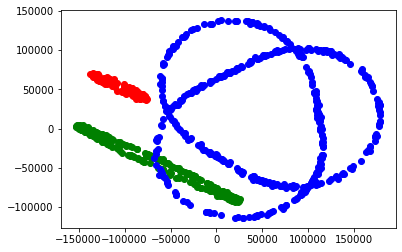

In [4]:
pca = PCA(n_components=2)
data_pca_twodim = pca.fit_transform(data)

print(data_pca_twodim)

plt.scatter(data_pca_twodim[:80,0], data_pca_twodim[:80,1] ,color = 'red')
plt.scatter(data_pca_twodim[80:320,0], data_pca_twodim[80:320,1] ,color = 'green')
plt.scatter(data_pca_twodim[320:,0], data_pca_twodim[320:,1], color = 'blue')
plt.show()

## TSNE 2D

In [45]:
# TSNE in 2D with various perplexities

data_embedded_list = []
perplexities = [5,30,50,100]

for i in perplexities:
    data_embedded_list.append(TSNE(n_components=2, perplexity = i, init = 'random', random_state = 12345).fit_transform(data))
# data_embedded_30 = TSNE(n_components=2, perplexity = 100, init = 'random').fit_transform(data)
# data_embedded_30

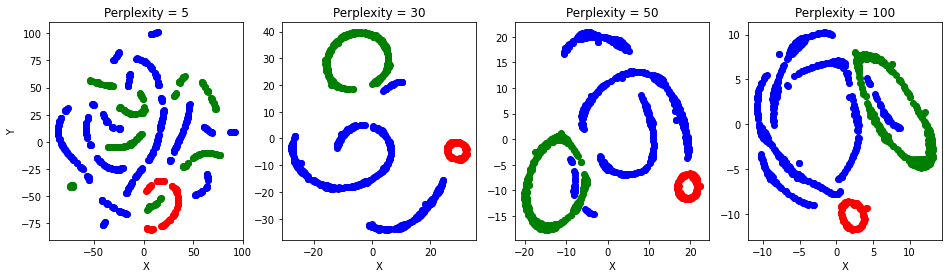

In [46]:
np.random.seed(12345)

fig,ax = plt.subplots(1,4,figsize = (16,4))


for i in range(4):
    
    ax[i].scatter(data_embedded_list[i][:80,0], data_embedded_list[i][:80,1], marker='o', color = 'red')
    ax[i].scatter(data_embedded_list[i][80:320,0], data_embedded_list[i][80:320,1], marker='o', color = 'green')
    ax[i].scatter(data_embedded_list[i][320:,0], data_embedded_list[i][320:,1], marker='o', color = 'blue')
    ax[i].set_xlabel('X')
    ax[i].set_title(f"Perplexity = {perplexities[i]}")
    
ax[0].set_ylabel('Y')
plt.show()

The best result is obtained using an intermediate value of perplexity (30)

## TSNE 3D

We tried also to apply TSNE with final output 3D space 

In [41]:
data_embedded_list_3D = []
perplexities = [5,30,50,100]

for i in perplexities:
    data_embedded_list_3D.append(TSNE(n_components=3, perplexity = i, init = 'random', random_state = 12345).fit_transform(data))
# data_embedded_30 = TSNE(n_components=2, perplexity = 100, init = 'random').fit_transform(data)
# data_embedded_30

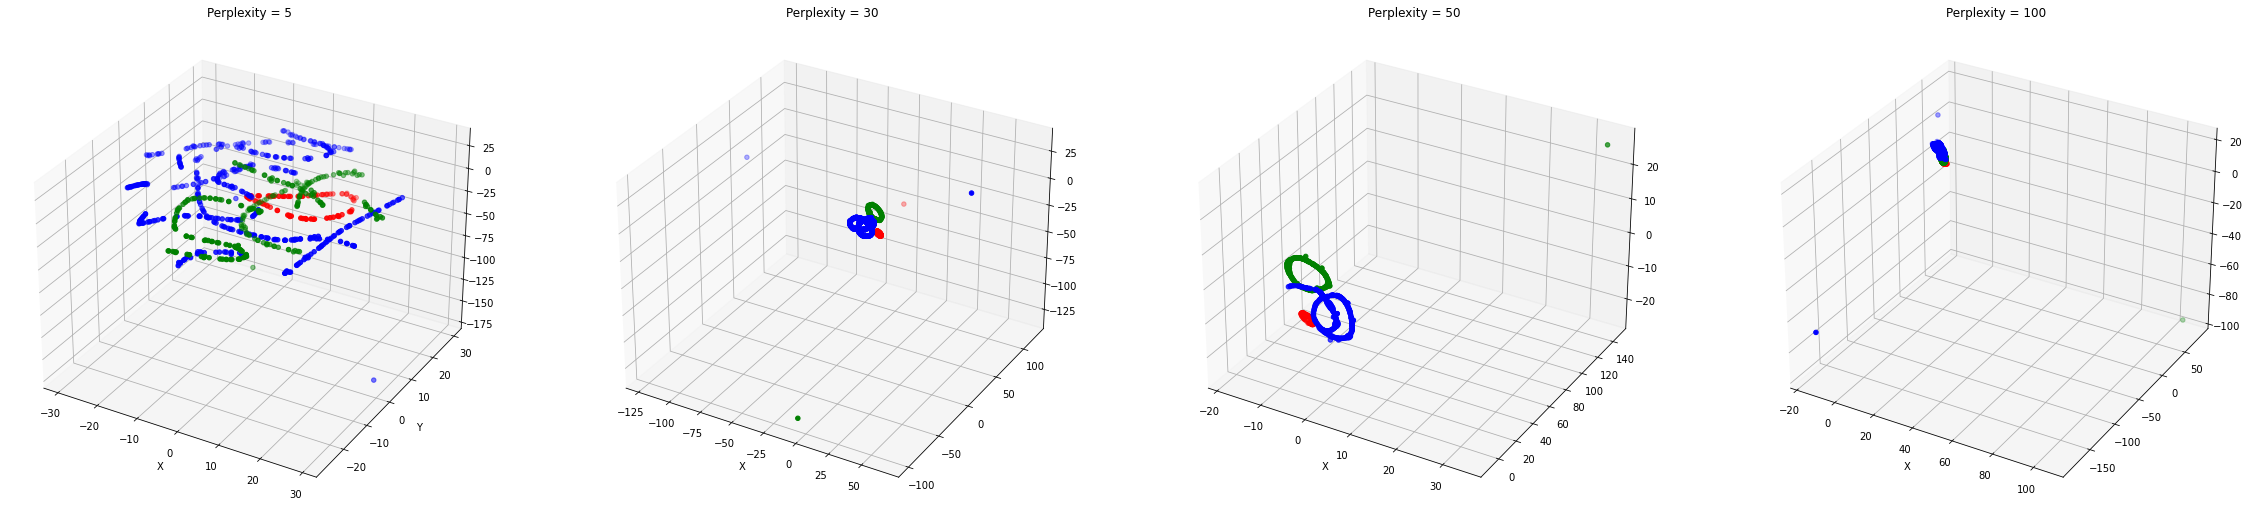

In [47]:
np.random.seed(12345)

fig = plt.figure(figsize = (40,20))

ax =[]

ax.append(fig.add_subplot(141, projection='3d'))
ax.append(fig.add_subplot(142, projection='3d'))
ax.append(fig.add_subplot(143, projection='3d'))
ax.append(fig.add_subplot(144, projection='3d'))

for i in range(4):
    
    ax[i].scatter(data_embedded_list_3D[i][:80,0], data_embedded_list_3D[i][:80,1],data_embedded_list_3D[i][:80,2], marker='o', color = 'red')
    ax[i].scatter(data_embedded_list_3D[i][80:320,0], data_embedded_list_3D[i][80:320,1], data_embedded_list_3D[i][80:320,2], marker='o', color = 'green')
    ax[i].scatter(data_embedded_list_3D[i][320:,0], data_embedded_list_3D[i][320:,1], data_embedded_list_3D[i][320:,2], marker='o', color = 'blue')
    ax[i].set_xlabel('X')
    ax[i].set_title(f"Perplexity = {perplexities[i]}")
    
ax[0].set_ylabel('Y')
plt.show()

TSNE gives some good results also in three dimensions. Nonetheless, some points are scattered far away and so the visualization of the plots is not so nice.

## Typical minimium distance between points

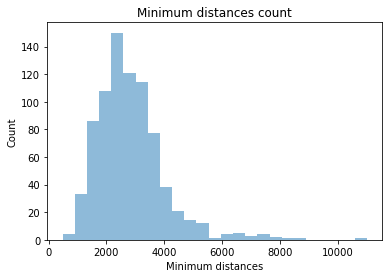

In [9]:
min_dist = []
for i in data.index:
    
    min_dist.append(np.sqrt(((data.drop(i)-data.loc[i])**2).sum(axis = 1).min()))

plt.hist(min_dist, bins = 25, alpha = 0.5)
plt.xlabel("Minimum distances")
plt.ylabel("Count")
plt.title("Minimum distances count")
plt.show()

As we can see minimum distances between points distributes around 2000, with some values over 10000. This, however, is not a useful result since it not gives an idea on how large epsilon must be to contain a reasonable number of points.

To get a more significant value ve choose a fixed number of neighbours and calculate the average distance between each point and his neighbours

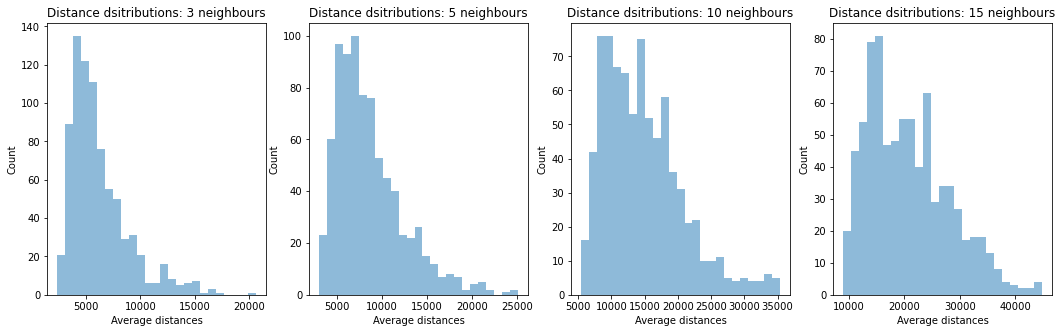

In [61]:
avg_dist = []
min_sample_range = [3,5,10,15]

avg_dist = [[np.sqrt(((data.drop(i)-data.loc[i])**2).sum(axis = 1).sort_values(ascending = True)).iloc[ran] for i in data.index] for ran in min_sample_range]

fig, ax = plt.subplots(1,4, figsize = (18,5))
for i in range(4):
    
    ax[i].hist(avg_dist[i], bins = 25, alpha = 0.5)
    ax[i].set_xlabel("Average distances")
    ax[i].set_ylabel("Count")
    ax[i].set_title(f"Distance dsitributions: {min_sample_range[i]} neighbours")
plt.show()

Of course, the distance between farer neighbours increases accordingly.
Moreover, the distribution seem to have the same shape. 
As we will see in the following part, DBSCAN performs best with 3 and 5 minpts. And the values of eps choosen will be such that the whole distribution stays on the left of such value.


## Eps estimate

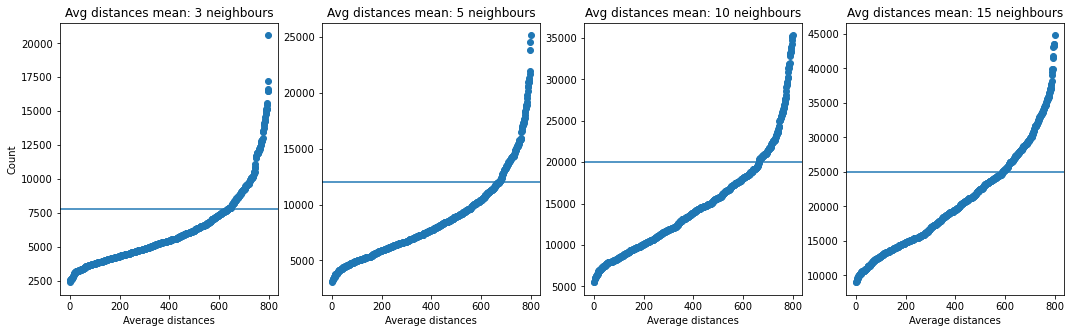

In [60]:
fig, ax = plt.subplots(1,4, figsize = (18,5))
values = [7800,12000,20000,25000]
for i in range(4):
    
    ax[i].scatter(range(len(avg_dist[i])), np.sort(avg_dist[i]))
    ax[i].axhline(values[i])
    ax[i].set_xlabel("Average distances")
    ax[i].set_title(f"Avg distances mean: {min_sample_range[i]} neighbours")
ax[0].set_ylabel("Count")
plt.show()


A [paper](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) suggests a way to find the best *eps* parameter depending on the choosen *minPts* value (- linked of course to DBSCAN).
This point is linked to a so called critical point, in which the curve has the highest change in the derivative. The idea is shown using horizontal lines.

Anyhow, in this case the best eps parameter is far from the ones this method would have predicted. 

## DBSCAN

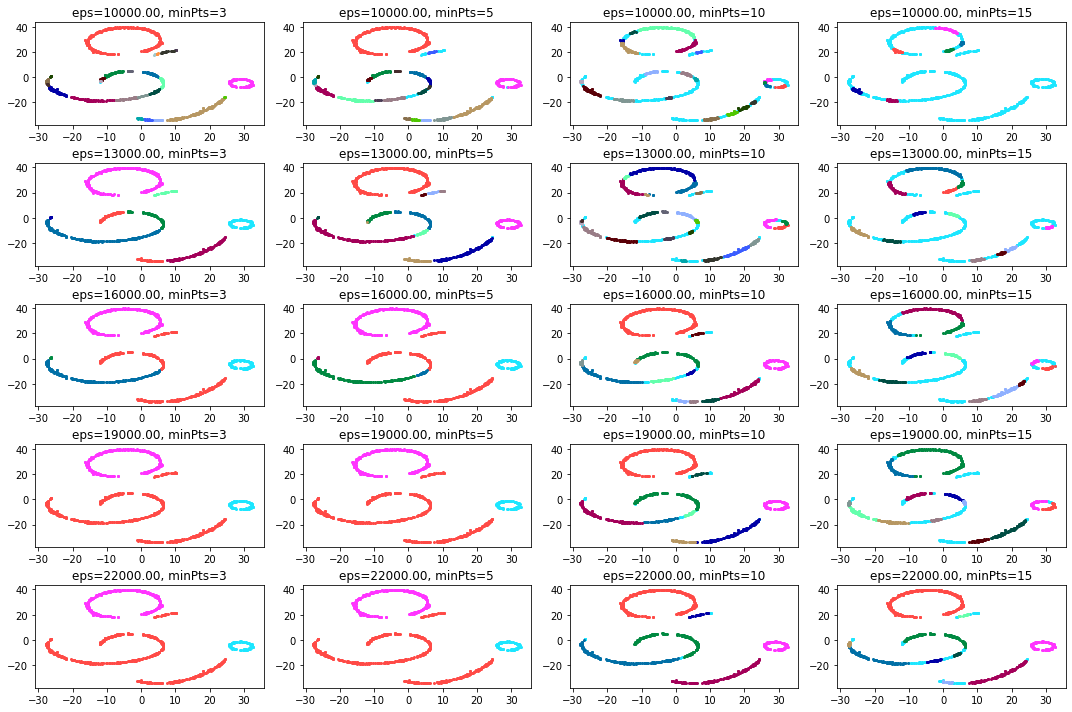

In [51]:
eps_range = [10000, 13000, 16000, 19000, 22000]
min_sample_range = [3,5,10,15]
cpalette = ["#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]

def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        ax.scatter(X[pos,0], X[pos,1], c=cpalette[i%len(cpalette)], s=4)
        
fig, ax = plt.subplots(len(eps_range),len(min_sample_range),figsize=(15,10))

for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(data)
        y = model.labels_
        plotting_ax(data_embedded_list[1],y,ax[i,j])
        ax[i,j].set_title('eps=%.2f, minPts=%i'%(eps,min_samples))

#         nmi=NMI(y, ytrue)
#         ax[i,j].set_title('eps=%.2f, minPts=%i, nmi=%.2f'%(eps,min_samples,nmi))
plt.tight_layout(h_pad=0.5)
plt.show()

Best result is obtained with eps = 19000-22000 and minPts = 3/5.
All clusters seem to be perfectly recognised. The hint given from the minimum distance in 5Dimensions in not of course yet present in the 2D reduction. 

There are no explicit links also to the method propsed by the paper for the *eps* estimation. We might suppose that this method also depends on the density and dimension of data considered.

# PART 2

In [120]:
x = np.loadtxt("DATA/x_M5_N400.csv")
y = np.loadtxt("DATA/y_M5_N400.csv")

x
y

array([2., 1., 4., 1., 2., 1., 1., 3., 1., 3., 0., 2., 1., 3., 2., 1., 2.,
       3., 0., 1., 3., 4., 0., 3., 4., 4., 3., 3., 1., 3., 2., 3., 0., 2.,
       4., 3., 3., 4., 3., 0., 3., 0., 0., 3., 2., 4., 4., 0., 1., 2., 2.,
       2., 1., 2., 1., 3., 0., 2., 4., 1., 2., 3., 3., 0., 3., 0., 2., 1.,
       3., 4., 4., 0., 3., 1., 0., 3., 0., 2., 1., 4., 1., 2., 4., 0., 3.,
       2., 4., 1., 4., 1., 1., 3., 0., 0., 0., 2., 2., 0., 4., 2., 0., 3.,
       2., 4., 4., 2., 3., 0., 4., 1., 1., 4., 1., 2., 3., 0., 0., 1., 3.,
       3., 0., 1., 3., 2., 0., 4., 1., 3., 4., 4., 1., 0., 1., 0., 1., 4.,
       3., 2., 0., 0., 4., 2., 1., 1., 0., 3., 2., 0., 2., 4., 2., 4., 1.,
       0., 0., 2., 2., 2., 3., 1., 1., 2., 3., 4., 2., 3., 1., 4., 0., 3.,
       3., 1., 4., 1., 4., 2., 2., 0., 0., 4., 1., 4., 0., 0., 4., 0., 3.,
       1., 3., 3., 2., 0., 0., 4., 0., 3., 1., 1., 1., 0., 0., 1., 2., 2.,
       0., 0., 1., 2., 2., 0., 1., 4., 0., 4., 2., 4., 2., 1., 3., 1., 0.,
       0., 0., 0., 1., 2.

## TSNE

In [13]:
x_embedded_list = []
perplexities = [10,30,50,100]

for i in perplexities:
    x_embedded_list.append(TSNE(n_components=2, perplexity = i, init = 'random').fit_transform(x))

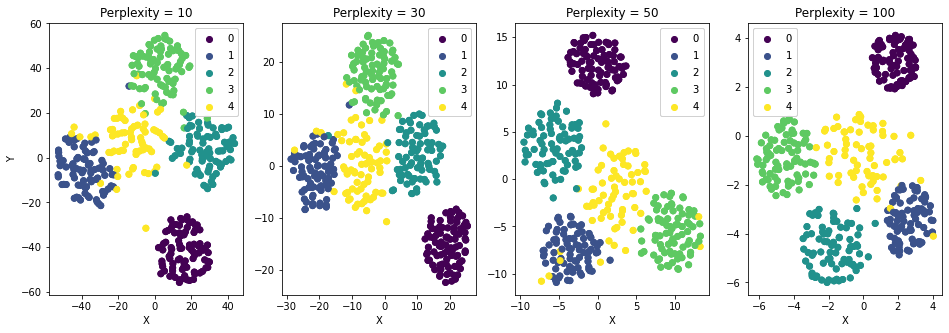

In [14]:
fig,ax = plt.subplots(1,4,figsize = (16,5))

for i in range(4):
    
    ax[i].scatter(x_embedded_list[i][:,0], x_embedded_list[i][:,1], c =  y)
    scatter = ax[i].scatter(x_embedded_list[i][:,0], x_embedded_list[i][:,1], c=y)

    legend1 = ax[i].legend(*scatter.legend_elements(),
                    loc="best")
    ax[i].add_artist(legend1)
    ax[i].set_xlabel('X')
    ax[i].set_title(f"Perplexity = {perplexities[i]}")
    
ax[0].set_ylabel('Y')
plt.show()

Even with perplexity = 25 - the best choice - the points with labels 1 and 4 are not completely distinguishable. 

This may be linked to a similarity of these two type of data in the initial sets.


## Typical minimium distance between points

We repeat the analysis over the minimum distance distribution between points.

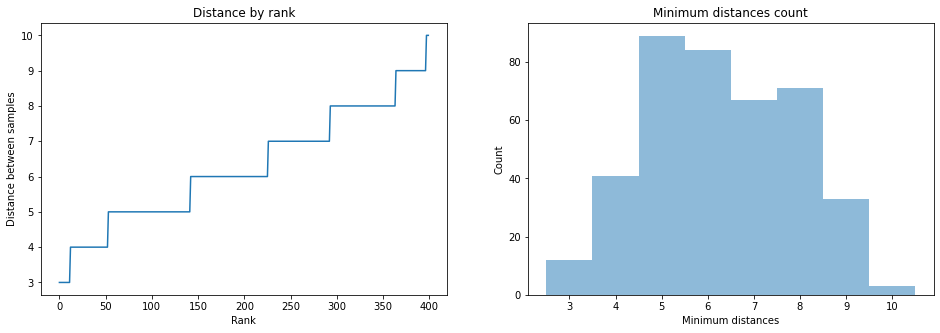

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
396,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
397,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
398,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [112]:
x = pd.DataFrame(x)
x

x_min_dist = []
for i in x.index:
    x_min_dist.append(np.abs(((x.drop(i)-x.loc[i]))).sum(axis = 1).min())

fig,ax = plt.subplots(1,2,figsize = (16,5))  
x_min_dist.sort()
ax[0].plot(x_min_dist)
ax[0].set_xlabel("Rank")
ax[0].set_ylabel("Distance between samples")
ax[0].set_title("Distance by rank")
ax[1].hist(x_min_dist, bins = np.arange(3,12)-.5, alpha = 0.5)
ax[1].set_xlabel("Minimum distances")
ax[1].set_ylabel("Count")
ax[1].set_title("Minimum distances count")
plt.show()

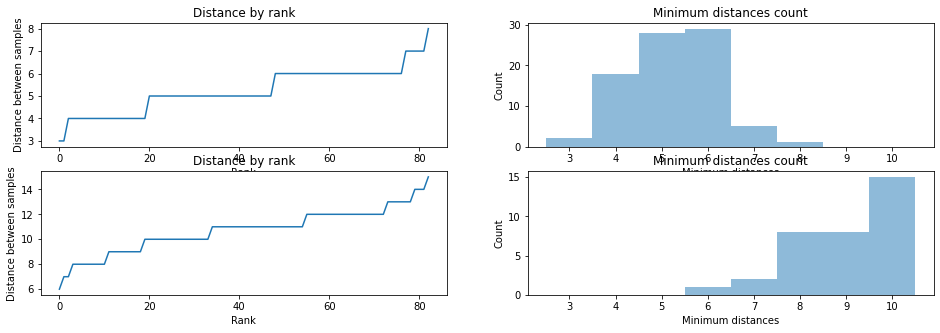

In [128]:
x1 = pd.DataFrame(x[y==1])
x1

x2 = pd.DataFrame(x[y==2])
x2

x_min_dist1_1 = []
for i in x1.index:
    x_min_dist1_1.append(np.abs(((x1.drop(i)-x1.loc[i]))).sum(axis = 1).min())
    
    
x_min_dist1_2 = []
for i in x1.index:
    x_min_dist1_2.append(np.abs(((x2-x1.loc[i]))).sum(axis = 1).min())
    


fig,ax = plt.subplots(2,2,figsize = (16,5))  
x_min_dist1_1.sort()
ax[0][0].plot(x_min_dist1_1)
ax[0][0].set_xlabel("Rank")
ax[0][0].set_ylabel("Distance between samples")
ax[0][0].set_title("Distance by rank")
ax[0][1].hist(x_min_dist1_1, bins = np.arange(3,12)-.5, alpha = 0.5)
ax[0][1].set_xlabel("Minimum distances")
ax[0][1].set_ylabel("Count")
ax[0][1].set_title("Minimum distances count")
x_min_dist1_2.sort()
ax[1][0].plot(x_min_dist1_2)
ax[1][0].set_xlabel("Rank")
ax[1][0].set_ylabel("Distance between samples")
ax[1][0].set_title("Distance by rank")
ax[1][1].hist(x_min_dist1_2, bins = np.arange(3,12)-.5, alpha = 0.5)
ax[1][1].set_xlabel("Minimum distances")
ax[1][1].set_ylabel("Count")
ax[1][1].set_title("Minimum distances count")
plt.show()

To get a useful quantity, we also repeat the analysis over the average distance

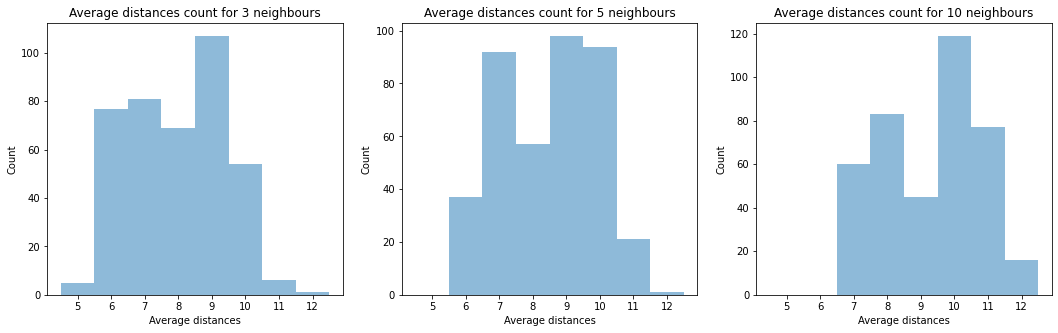

In [107]:
avg_dist = []
min_sample_range = [3,5,10]

avg_dist = [[(np.abs(x.drop(i)-x.loc[i])).sum(axis = 1).sort_values(ascending = True).iloc[ran] for i in x.index] for ran in min_sample_range]

fig, ax = plt.subplots(1,len(min_sample_range), figsize = (18,5))
for i in range(len(min_sample_range)):
    ax[i].hist(avg_dist[i], bins = np.arange(5,14)-.5, alpha = 0.5)
    ax[i].set_xlabel("Average distances")
    ax[i].set_ylabel("Count")
    ax[i].set_title(f"Average distances count for {min_sample_range[i]} neighbours")
plt.show()

## DBSCAN

We now try using different eps values and different minPts. 

In this case we only have a limited choice of the eps values, as distances can be of only integers (taking the l1-manhattan distance in the 36 dim).


The eps parameters we chose are 5,6,9, and no other one seems to have any better behaviour.

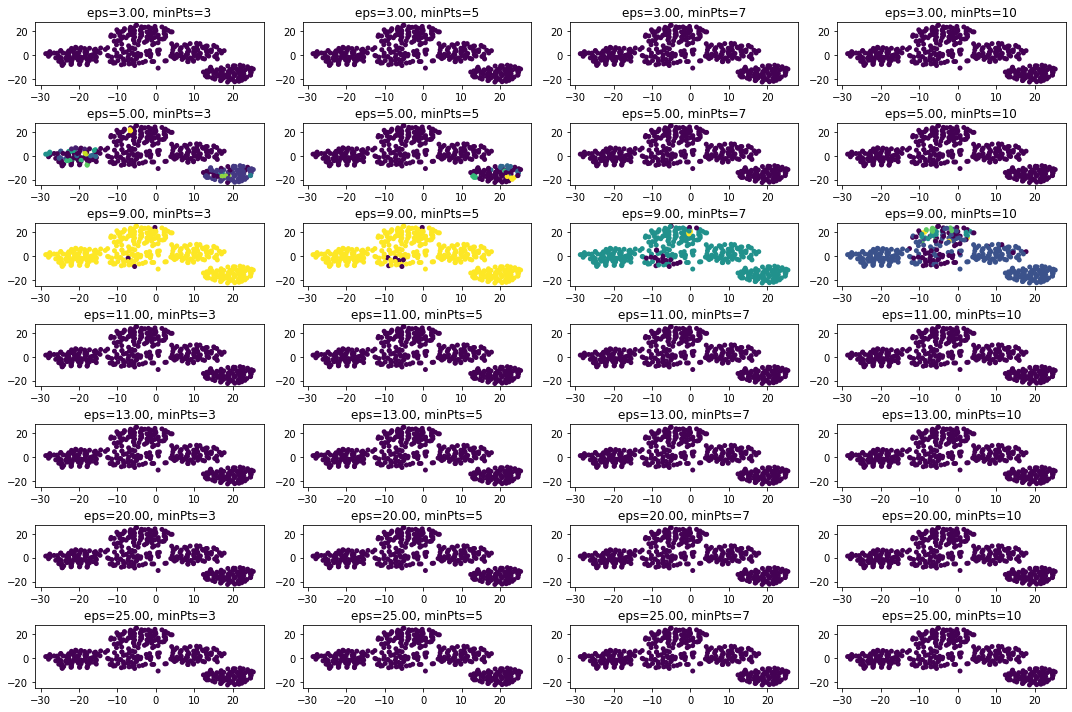

In [106]:
eps_range = [3,5,9, 11, 13, 20, 25, ]
min_sample_range = [3,5,7,10]
cpalette = ["#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]

def plotting_ax(X, y, ax):
    # plotting function
#     for i, yu in enumerate(np.unique(y)):
#         pos = (y == yu)
    ax.scatter(X[:,0], X[:,1], c=y, s=4, lw = 3)
        
fig, ax = plt.subplots(len(eps_range),len(min_sample_range),figsize=(15,10))
borgo = []

for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples, metric = 'manhattan')
        model.fit(x)
        borgo.append(model.labels_)
        y = model.labels_
        plotting_ax(x_embedded_list[1],y,ax[i,j])
        ax[i,j].set_title('eps=%.2f, minPts=%i'%(eps,min_samples))

#         nmi=NMI(y, ytrue)
#         ax[i,j].set_title('eps=%.2f, minPts=%i, nmi=%.2f'%(eps,min_samples,nmi))
plt.tight_layout(h_pad=0.5)
plt.show()

The algorithm does not manage to split correctly the data, and the only cluster that is recognised (in some lucky cases) correctly is the y = 0 one. 
Moreover, while in the previous case it was possible to increase the eps parameter by an order of magnitude and get the best results, in this case we can increase the eps parameter only up to 10, which is the maximum reachable distance. 


## TSNE and DBSCAN

We can easily show how DBSCAN works very well after one TSNE is applied, as we expect from a "visual" point of view.

The best results are achieved using eps = 3, and minpts = 7. 
Even if the paramters are called the same, one must not compare the parameters used in the previous case with respect to this one. In particular, the distance is computed in 36 and 2 dimensions respectively.


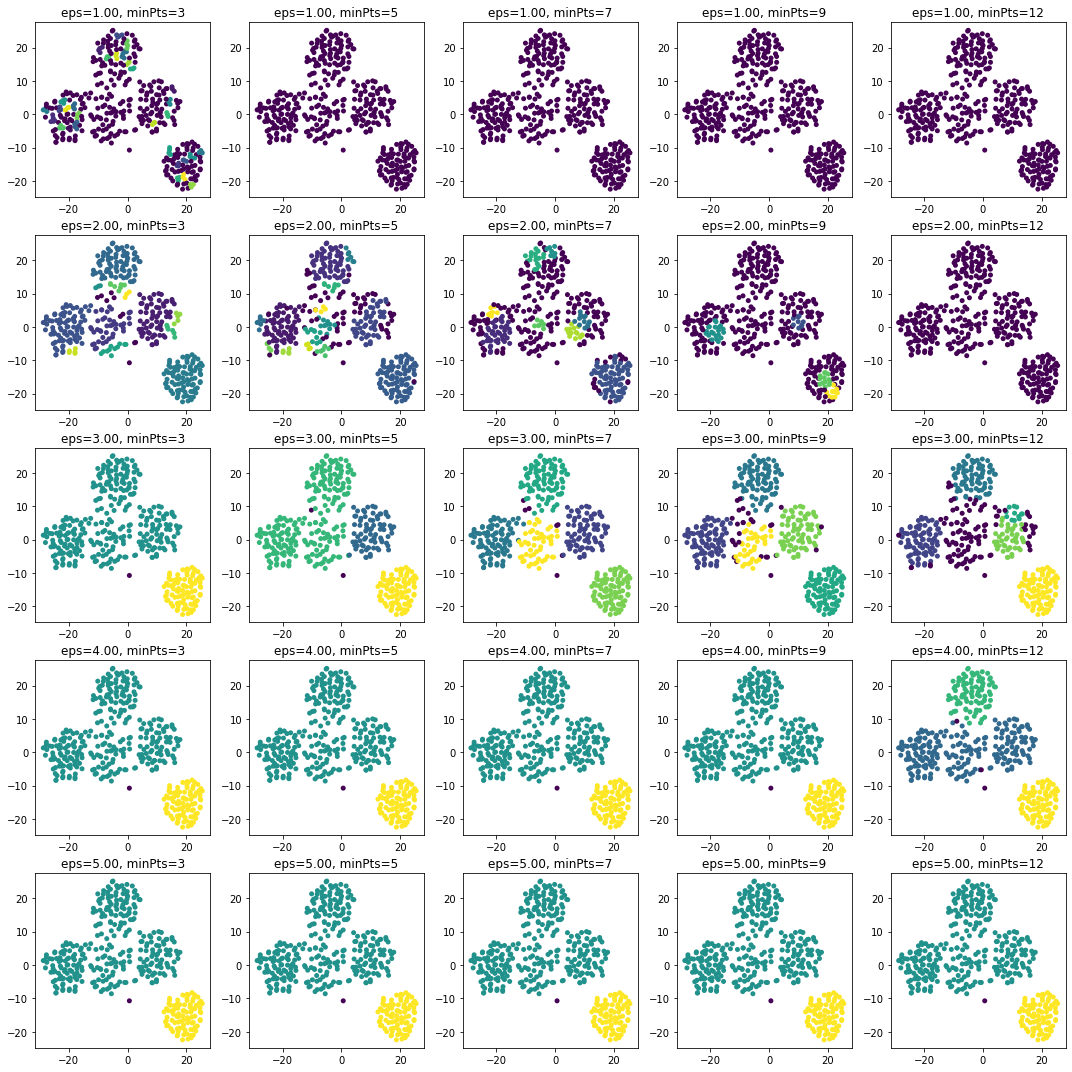

In [67]:
eps_range = [1,2,3,4,5]
min_sample_range = [3,5,7,9,12]
cpalette = ["#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]

def plotting_ax(X, y, ax):
    # plotting function
#     for i, yu in enumerate(np.unique(y)):
#         pos = (y == yu)
    ax.scatter(X[:,0], X[:,1], c=y, s=4, lw = 3)
        
fig, ax = plt.subplots(len(eps_range),len(min_sample_range),figsize=(15,15))
borgo = []

for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(x_embedded_list[1])
        borgo.append(model.labels_)
        y = model.labels_
        plotting_ax(x_embedded_list[1],y,ax[i,j])
        ax[i,j].set_title('eps=%.2f, minPts=%i'%(eps,min_samples))

#         nmi=NMI(y, ytrue)
#         ax[i,j].set_title('eps=%.2f, minPts=%i, nmi=%.2f'%(eps,min_samples,nmi))
plt.tight_layout(h_pad=0.5)
plt.show()

## KMEANS - AGG_CLUSTERING

We can also observe that the Kmeans algotithm works fine also in 36 dimensions.

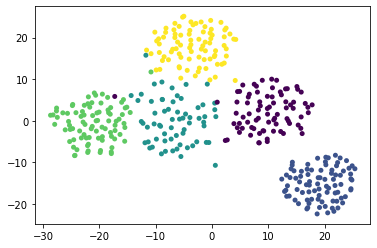

In [68]:
model = KMeans(n_clusters = 5)
y_k = model.fit(x).labels_
fig, ax = plt.subplots(1,1)
plotting_ax(x_embedded_list[1],y_k,ax)

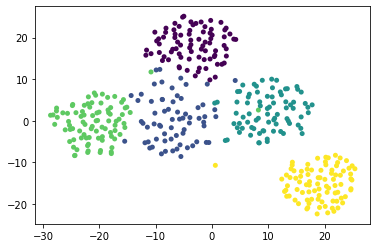

In [111]:
from sklearn.cluster import AgglomerativeClustering

model_agg = AgglomerativeClustering(n_clusters = 5, affinity = "manhattan", linkage = 'complete')

y_agg = model_agg.fit(x).labels_
fig, ax = plt.subplots(1,1)
plotting_ax(x_embedded_list[1],y_agg,ax)

As noticed, the two aggolomerative algorithm actually work with the original 36-dim data. On the other hand, the DBSCAN algorithm fails to reconstruct correctly the clusters. 

Moreover, the agglomerative clustering algorithm manages to find the right ensamble also with the "l1" distance we exploited for the DBSCAN algorithm. 

We try do address this problem to the fact that density is in a certain sense "quantized" and their density in the original space is 

This may be linked to the fact that the initial data are "too close to each other", and then considering every epsilon basically brings to the 